In [39]:
import numpy as np
import pandas as pd
import random as r

In [40]:
#create our dataset
data=[]

for _ in range(500):
    team_name=f"Team {chr(r.randint(65,90))}"
    season=r.randint(2010,2023)
    wins=r.randint(50,110)
    losses=162-wins
    hits=r.randint(1200,1600)
    doubles=r.randint(200,350)
    triples=r.randint(10,40)
    home_runs=r.randint(100,250)
    strikeouts=r.randint(1000,1500)

    hits_adjusted=hits+(wins-80)*5
    doubles_adjusted=doubles+(wins-80)*2
    triples_adjusted=triples+(wins-80)
    home_runs_adjusted=home_runs+(wins-80)*3
    strikeouts_adjusted=strikeouts-(wins-80)*10

    data.append([team_name,season,wins,losses,hits_adjusted,doubles_adjusted,triples_adjusted,home_runs_adjusted,strikeouts_adjusted])

In [41]:
columns=["Team","Season","Wins","Losses","Hits","Doubles","Triples","HomeRuns","StrikeOuts"]

df=pd.DataFrame(data=data,columns=columns)
df.sample(5)

,Team,Season,Wins,Losses,Hits,Doubles,Triples,HomeRuns,StrikeOuts
230,Team P,2012,86,76,1448,352,29,148,1389
415,Team G,2016,103,59,1551,287,63,213,1011
336,Team Z,2013,110,52,1627,381,62,257,938
362,Team V,2018,80,82,1456,308,30,184,1368
206,Team R,2014,95,67,1386,231,47,201,1322


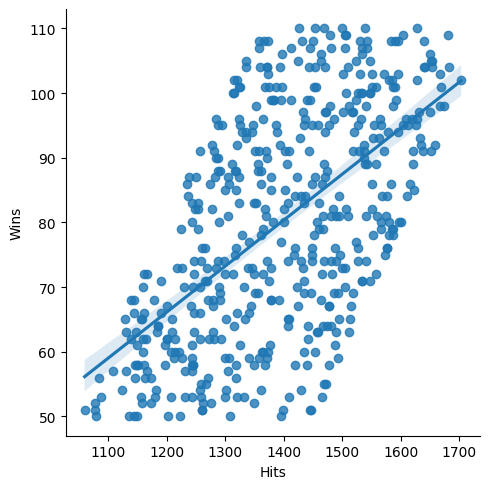

In [42]:
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.lmplot(x="Hits",y="Wins",data=df)
plt.show()

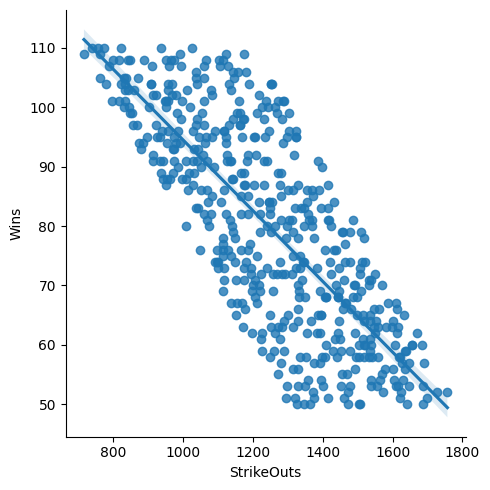

In [43]:
sbn.lmplot(x="StrikeOuts",y="Wins",data=df)
plt.show()

In [44]:
#Team season and losses columns doesn't affect wins

df2=df.drop(columns=["Team","Losses","Season"])
df2.sample(6)

,Wins,Hits,Doubles,Triples,HomeRuns,StrikeOuts
440,72,1558,283,8,135,1195
353,53,1243,266,5,147,1451
300,95,1295,233,47,206,1045
254,68,1291,247,18,95,1331
447,54,1361,169,12,134,1357
44,52,1078,177,6,63,1757


In [45]:
#split our daat as x and y
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'StrikeOuts'], dtype='object')

In [46]:
#x
x=df[['Hits', 'Doubles', 'Triples', 'HomeRuns', 'StrikeOuts']]
x

,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,1478,299,16,158,1336
1,1622,234,38,149,1187
2,1519,258,12,207,1197
3,1174,166,-8,84,1624
4,1392,246,21,179,1445
...,...,...,...,...,...
495,1162,248,-9,123,1622
496,1321,308,20,124,1560
497,1319,229,-5,147,1328
498,1223,242,-19,46,1326


In [47]:
#y
y=df2[['Wins']]
y

,Wins
0,58
1,85
2,69
3,52
4,68
...,...
495,58
496,66
497,56
498,50


In [48]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [49]:
x_train

,Hits,Doubles,Triples,HomeRuns,StrikeOuts
211,1466,321,17,231,1069
84,1409,223,11,148,1648
398,1302,296,-6,112,1537
118,1309,149,4,88,1506
126,1243,171,-3,183,1558
...,...,...,...,...,...
401,1278,329,52,181,1126
343,1681,361,40,211,1175
192,1349,196,-5,99,1248
387,1323,255,26,155,1394


In [50]:
y_train

,Wins
211,86
84,53
398,54
118,50
126,58
...,...
401,92
343,109
192,58
387,83


In [51]:
x_test

,Hits,Doubles,Triples,HomeRuns,StrikeOuts
421,1372,223,5,152,1100
105,1393,252,52,221,1251
222,1463,273,42,242,871
119,1210,259,-3,170,1151
347,1292,209,8,96,1220
...,...,...,...,...,...
266,1542,361,48,237,966
413,1336,362,60,280,780
100,1566,200,11,99,1251
82,1432,367,38,259,973


In [52]:
y_test

,Wins
421,74
105,104
222,105
119,65
347,69
...,...
266,108
413,104
100,79
82,108


In [53]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [54]:
#it returns R²,The closer the R² value is to 1, the better the model is. Negative value is the worst value

lr.score(x_test,y_test)

0.8714508377076868

In [55]:
lr.score(x_train,y_train)

0.8862681315734596

In [56]:
#Overfitting: If the model scores very high on the training data but low on the test data, it means the model fits the training data too well but fails to generalize to new data. In this case, the model may have learned the noise in the training data.

#Underfitting: If the model scores low on both the training and test data, it means the model has not learned the relationships in the data well enough. You can improve performance by increasing the model's complexity or adding more features.

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_predicted=lr.predict(x_test)
y_predicted

array([[ 70.21829663],
       [ 92.52407604],
       [ 97.4569626 ],
       [ 66.47146692],
       [ 65.15134308],
       [ 90.71240916],
       [ 58.82241027],
       [ 68.38042629],
       [ 73.55985295],
       [ 47.79074765],
       [ 49.53459211],
       [ 96.45163153],
       [ 78.41221895],
       [ 87.8569314 ],
       [ 87.58517384],
       [ 59.75108001],
       [114.18565924],
       [ 63.90031201],
       [ 47.91977485],
       [ 97.19351446],
       [ 93.08802689],
       [ 47.14785856],
       [ 43.34543552],
       [ 66.20362437],
       [ 83.66045635],
       [ 99.83731752],
       [ 75.33922681],
       [ 62.62724697],
       [111.39417162],
       [ 95.9861629 ],
       [ 98.92979544],
       [ 66.34374198],
       [ 90.87672911],
       [ 63.20081867],
       [ 62.32828828],
       [ 65.32776602],
       [ 51.97830487],
       [ 57.59014142],
       [ 98.84651961],
       [ 67.5888228 ],
       [ 97.81779591],
       [ 88.0547953 ],
       [ 96.11231644],
       [106

In [60]:
#the more less mean absolute error result, the better result 
mean_absolute_error(y_test,y_predicted)

5.51084406457016

In [61]:
mean_squared_error(y_test,y_predicted)

44.128600675113645

In [64]:
#same with
#lr.score(x_test,y_test) result
r2_score(y_test,y_predicted)

0.8714508377076868

In [65]:
#right in the same order with columns of x
lr.coef_

array([[ 0.01112022,  0.039486  ,  0.42579752,  0.05078584, -0.01714931]])

In [66]:
x.columns

Index(['Hits', 'Doubles', 'Triples', 'HomeRuns', 'StrikeOuts'], dtype='object')

In [67]:
#constant variable
#when all independent variables(x columns) are 0, y will be the result below
lr.intercept_

array([55.17177873])

In [69]:
#BACKWARD ELIMINATION
#check out p values(max values are not proper for model)

import statsmodels.api as sm
#add b0 values in equation
#equation=====>   Y=B0+B1X1+B2X2+B3X3+ERROR_RATE 

X=np.append(arr=np.ones((500,1)).astype(int),values=df2,axis=1)
X


array([[   1,   58, 1478, ...,   16,  158, 1336],
       [   1,   85, 1622, ...,   38,  149, 1187],
       [   1,   69, 1519, ...,   12,  207, 1197],
       ...,
       [   1,   56, 1319, ...,   -5,  147, 1328],
       [   1,   50, 1223, ...,  -19,   46, 1326],
       [   1,  103, 1595, ...,   35,  201,  860]], dtype=int64)

In [70]:
df2

,Wins,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,58,1478,299,16,158,1336
1,85,1622,234,38,149,1187
2,69,1519,258,12,207,1197
3,52,1174,166,-8,84,1624
4,68,1392,246,21,179,1445
...,...,...,...,...,...,...
495,58,1162,248,-9,123,1622
496,66,1321,308,20,124,1560
497,56,1319,229,-5,147,1328
498,50,1223,242,-19,46,1326


In [83]:
#create a list consisting of each column except y in df2.

X_list=df2.iloc[:,[1,2,3,4,5]].values
X_list

array([[1478,  299,   16,  158, 1336],
       [1622,  234,   38,  149, 1187],
       [1519,  258,   12,  207, 1197],
       ...,
       [1319,  229,   -5,  147, 1328],
       [1223,  242,  -19,   46, 1326],
       [1595,  365,   35,  201,  860]], dtype=int64)

In [84]:
y=df2.iloc[:,1]
y

0      1478
1      1622
2      1519
3      1174
4      1392
       ... 
495    1162
496    1321
497    1319
498    1223
499    1595
Name: Hits, Length: 500, dtype: int64

In [85]:
X_list=np.array(X_list,dtype=float)
model=sm.OLS(y,X_list).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Hits   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.546e+33
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        23:15:54   Log-Likelihood:                          13749.
No. Observations:                 500   AIC:                                 -2.749e+04
Df Residuals:                     495   BIC:                                 -2.747e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   7.72e-17   1.29e+16      0.000       1.000       1.000
x2          1.221e-15   2.61e-16      4.674      0.000    7.08e-16    1.73e-15
x3         -5.329e-15   1.03e-15     -5.163      0.000   -7.36e-15    -3.3e-15
x4          -2.22e-16   2.66e-16     -0.834      0.405   -7.45e-16    3.01e-16
x5          -3.14e-16   5.69e-17     -5.517      0.000   -4.26e-16   -2.02e-16
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.511
Skew:                          -0.077   Prob(JB):                        0.775
Kurtosis:                       2.975   Cond. No.                         159.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#the content of X_list is as follows
#all p values are normal
df2.iloc[:,[1,2,3,4,5]]

,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,1478,299,16,158,1336
1,1622,234,38,149,1187
2,1519,258,12,207,1197
3,1174,166,-8,84,1624
4,1392,246,21,179,1445
...,...,...,...,...,...
495,1162,248,-9,123,1622
496,1321,308,20,124,1560
497,1319,229,-5,147,1328
498,1223,242,-19,46,1326
